After running the BOHB HPO with me_unet_loso_3d_hpo.py, visualize the results and select the model configurations with the best validation Dice.

In [1]:
RESULTSDIR = '/archive/bioinformatics/DLLab/KevinNguyen/results/MEDL/prostate_segmentation_3d_LOSO_20210210/me_unet_hpo'

In [2]:
import os
import glob
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from ray.tune.analysis import Analysis

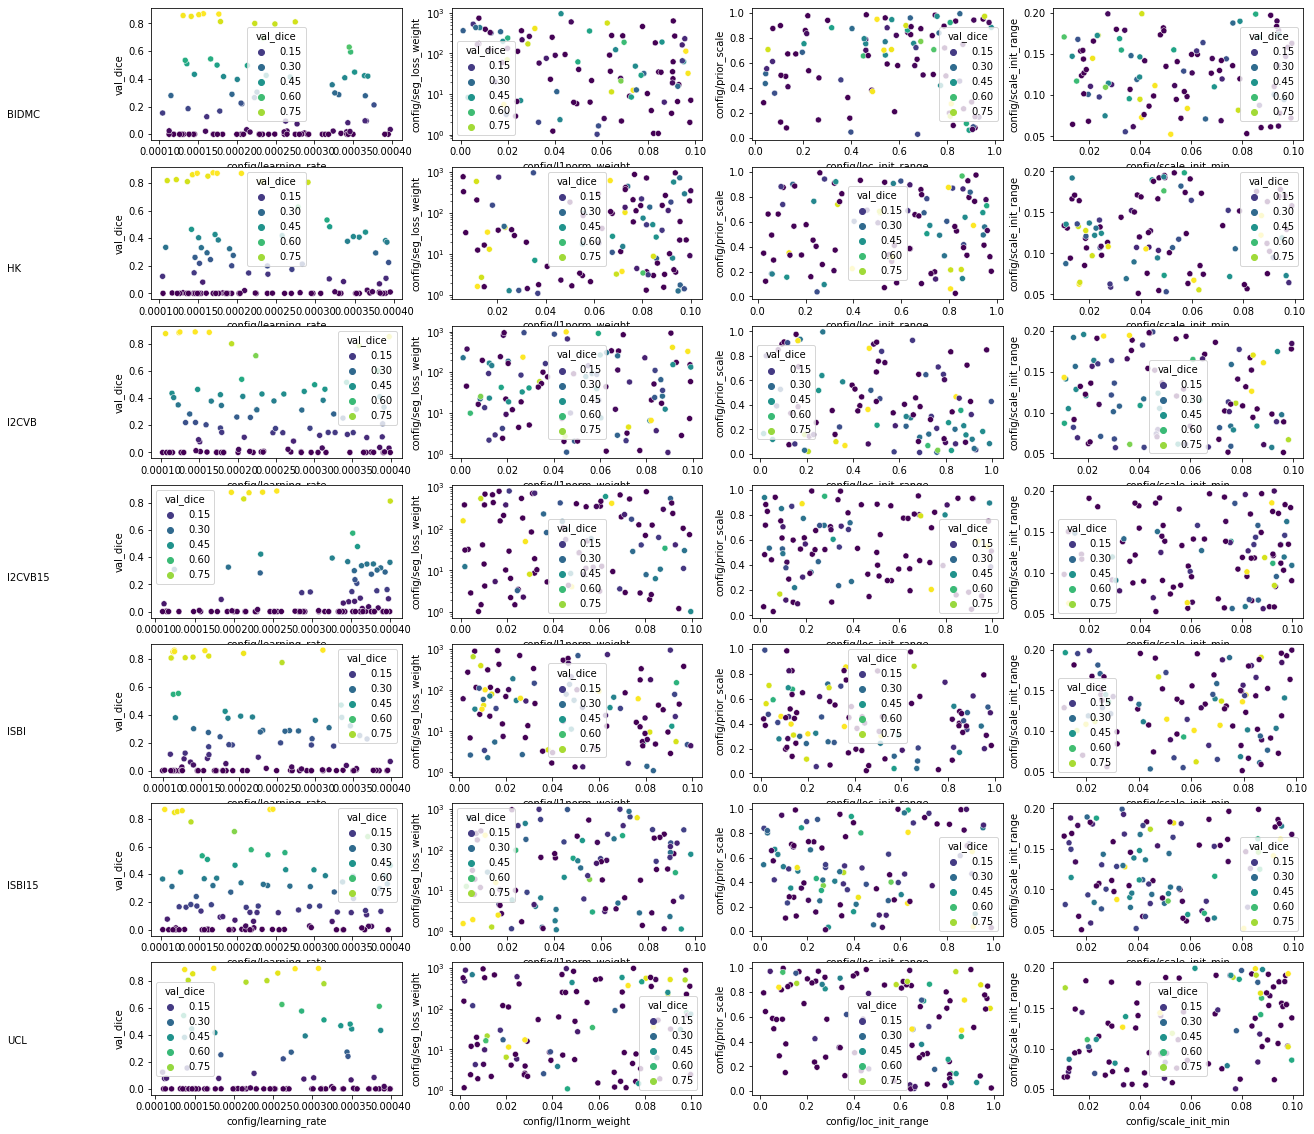

In [11]:
lsBestConfigs = []
# List of directories containing HPO results for each held-out site
lsSiteDirs = sorted(glob.glob(os.path.join(RESULTSDIR, '*')))

fig, ax = plt.subplots(len(lsSiteDirs), 4, figsize=(20, 20))
for iSite, strSiteDir in enumerate(lsSiteDirs):
    strSite = strSiteDir.split(os.path.sep)[-1]
    analysis = Analysis(strSiteDir)
    df = analysis.dataframe('val_dice', 'max')
    iBestTrial = df['val_dice'].idxmax()
    lsBestConfigs += [df.iloc[iBestTrial]]

    sns.scatterplot(data=df, x='config/learning_rate', y='val_dice', hue='val_dice', ax=ax[iSite, 0], palette='viridis')
    sns.scatterplot(data=df, x='config/l1norm_weight', y='config/seg_loss_weight', hue='val_dice', ax=ax[iSite, 1], palette='viridis')
    ax[iSite, 1].set(yscale='log')
    sns.scatterplot(data=df, x='config/loc_init_range', y='config/prior_scale', hue='val_dice', ax=ax[iSite, 2], palette='viridis')
    sns.scatterplot(data=df, x='config/scale_init_min', y='config/scale_init_range', hue='val_dice', ax=ax[iSite, 3], palette='viridis')

    plt.figtext(0, 0.77 * (1 - (iSite - 0.5)/ len(lsSiteDirs)), strSite)

fig.subplots_adjust(left=0.1)
dfBestConfigs = pd.concat(lsBestConfigs, axis=1).T
dfBestConfigs.index = dfBestConfigs['config/held-out_site']
fig.show()

In [4]:
dfBestConfigs

,loss,dice,val_loss,val_dice,time_this_iter_s,should_checkpoint,done,timesteps_total,episodes_total,training_iteration,...,experiment_tag,config/held-out_site,config/l1norm_weight,config/learning_rate,config/loc_init_range,config/prior_scale,config/scale_init_min,config/scale_init_range,config/seg_loss_weight,logdir
config/held-out_site,,,,,,,,,,,,,,,,,,,,,
BIDMC,16737.2,0.923322,16737.7,0.870568,11.3342,True,False,NaN,NaN,83,...,"100_held-out_site=BIDMC,l1norm_weight=0.018406...",BIDMC,0.018406,0.000156796,0.818238,0.273589,0.0519214,0.0525448,5.49534,/archive/bioinformatics/DLLab/KevinNguyen/resu...
HK,18902.9,0.920863,18903.1,0.874276,11.3952,True,False,NaN,NaN,107,...,"100_held-out_site=HK,l1norm_weight=0.011901,le...",HK,0.0119015,0.000169318,0.395367,0.223125,0.0420231,0.105605,1.60199,/archive/bioinformatics/DLLab/KevinNguyen/resu...
I2CVB,3482.64,0.952795,3580.77,0.886887,10.7697,True,False,NaN,NaN,111,...,"29_held-out_site=I2CVB,l1norm_weight=0.045415,...",I2CVB,0.0454153,0.000144589,0.843881,0.466402,0.0108434,0.143207,978.328,/archive/bioinformatics/DLLab/KevinNguyen/resu...
I2CVB15,1408.66,0.965942,1458.16,0.886608,10.5444,True,False,NaN,NaN,126,...,"38_held-out_site=I2CVB15,l1norm_weight=0.06541...",I2CVB15,0.0654149,0.000255049,0.94052,0.58928,0.0919059,0.185415,405.634,/archive/bioinformatics/DLLab/KevinNguyen/resu...
ISBI,2950.46,0.933851,2962.11,0.861728,9.82741,True,False,NaN,NaN,106,...,"99_held-out_site=ISBI,l1norm_weight=0.011181,l...",ISBI,0.0111806,0.000310914,0.356662,0.377006,0.0794892,0.135907,101.592,/archive/bioinformatics/DLLab/KevinNguyen/resu...
ISBI15,1.15801e+06,0.945819,1.15801e+06,0.869455,9.7263,True,False,NaN,NaN,126,...,"100_held-out_site=ISBI15,l1norm_weight=0.00128...",ISBI15,0.0012832,0.000246369,0.912732,0.0377646,0.0807275,0.0518647,1.48619,/archive/bioinformatics/DLLab/KevinNguyen/resu...
UCL,2571.2,0.948595,2573.37,0.889956,11.291,True,False,NaN,NaN,136,...,"54_held-out_site=UCL,l1norm_weight=0.028118,le...",UCL,0.0281182,0.000174389,0.862748,0.493073,0.0982854,0.193002,17.1457,/archive/bioinformatics/DLLab/KevinNguyen/resu...
